In [1]:
import numpy as np
from matplotlib import pyplot as plt   
import matplotlib.pyplot as plt
import pandas as pd
import math
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
import cv2
plt.style.use(astropy_mpl_style)
#plt.style.use("default")
#import sys
#sys.path.append('/Users/shaivi/mypy/')
import tvg
from matplotlib import pyplot, image, transforms
import scipy
import skimage

In [3]:
conti = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_conti_index.fits')
magincl = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magincl_index.fits')
magfield = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_magfield_index.fits')
dopp = fits.open('file:///sanhome/shaivi/data/Phil_Shirts/SPcubes_20170915_224806_dopp1_index.fits')

num_scans = 30
dim = conti[1].data.shape
data_conti = np.zeros((dim[0], dim[1], num_scans))
data_magincl = np.zeros((dim[0], dim[1], num_scans))
data_Bz = np.zeros((dim[0], dim[1], num_scans))
#data_dopp = np.zeros((dim[0], dim[1], num_scans))

for i in range(num_scans):
    data_conti_temp = conti[i+1].data
    #data_conti_2=(data_conti_temp - data_conti_temp.min())*(255.0/(data_conti_temp - data_conti_temp.min()).max())
    #data_conti[:,:,i] = data_conti_2
    data_conti[:,:,i] = data_conti_temp
    np.save('/Users/shaivi/Downloads/test_conti.npy', data_conti)
   
    data_magincl_temp = magincl[i+1].data
    #data_magincl_2=(data_magincl_temp - data_magincl_temp.min())*(255.0/(data_magincl_temp - data_magincl_temp.min()).max())
    #data_magincl[:,:,i] = data_magincl_2
    data_magincl[:,:,i] = data_magincl_temp
    np.save('/Users/shaivi/Downloads/test_magincl.npy', data_magincl)

    data_magfield_temp = magfield[i+1].data
    Bz_temp =  data_magfield_temp*(np.cos(np.array(np.deg2rad(data_magincl_temp))))
    #data_Bz_2=(Bz_temp - Bz_temp.min())*(255.0/(Bz_temp - Bz_temp.min()).max())
    #data_Bz[:,:,i] = data_Bz_2
    data_Bz[:,:,i] = Bz_temp
    
    np.save('/Users/shaivi/Downloads/test_Bz.npy', data_Bz)
    
    #data_dopp_temp = dopp[i+1].data
    #data_dopp_2=(data_dopp_temp - data_dopp_temp.min())*(255.0/(data_dopp_temp - data_dopp_temp.min()).max())
    #data_dopp[:,:,i] = data_dopp_2
    #np.save('/Users/shaivi/Downloads/test_dopp1.npy', data_dopp)
    
dim = data_Bz.shape
alltogether = np.zeros((dim[0], dim[1]*3, dim[2]))
j = 0; alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_conti
j = 1 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_magincl
j = 2 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_Bz
#j = 3 ;alltogether[:,j*dim[1]:(j+1)*dim[1],:] = data_dopp

In [25]:
data_magincl_temp
from scipy.ndimage import rotate
new_data_magincl_temp =  rotate(data_magincl_temp, angle=45)
import tvg
tvg.show(new_data_magincl_temp)
print(data_magfield_temp.shape, new_data_magincl_temp.shape)

[]
(384, 120) (356, 356)


In [ ]:
Bz_temp[7].max()

16.440376

In [6]:
Bz_temp[7].min()

-115.4769

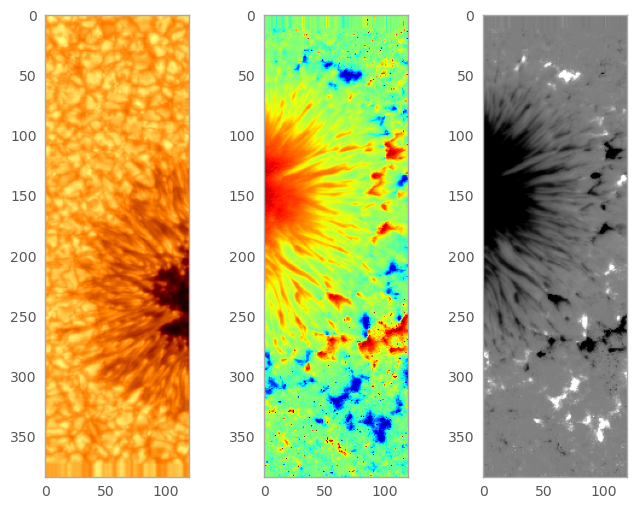

In [21]:
a = 145
b = 165
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[:,:,21], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[:,:,21], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[:,:,21], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

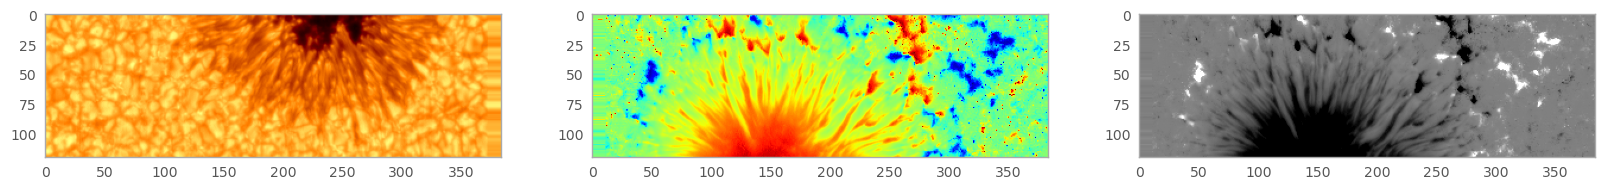

In [24]:
#ROTATE
array = data_conti
data_conti_rot = np.rot90(array)
array2 = data_magincl
data_magincl_rot = np.rot90(array2)
array3 = data_Bz
data_Bz_rot = np.rot90(array3)

a = 145
b = 165
plt.ion()
fig, ax = plt.subplots(1,3, figsize=[20,20])
ax[0].imshow(data_conti_rot[:,:,21], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl_rot[:,:,21], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz_rot[:,:,21], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

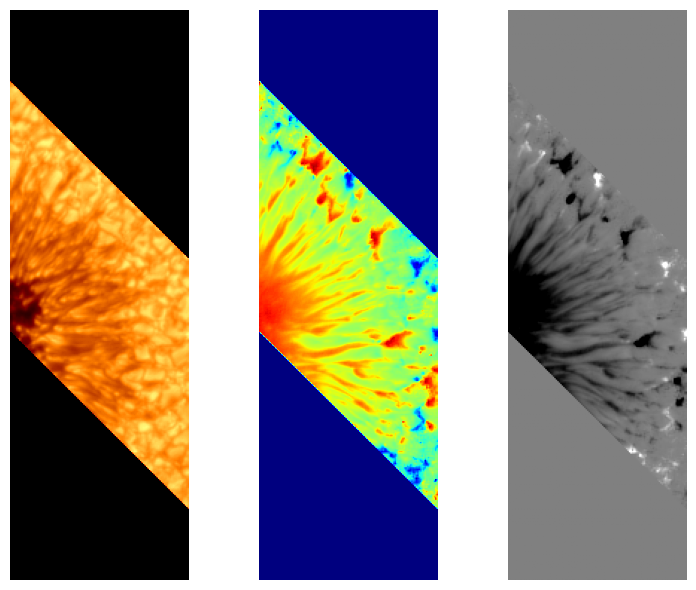

In [10]:
#ROTATE METHOD2
from scipy import ndimage
import matplotlib.pyplot as plt

dc_rot = ndimage.rotate(data_conti, 45, reshape=False)
mi_rot = ndimage.rotate(data_magincl, 45, reshape=False)
bz_rot = ndimage.rotate(data_Bz, 45, reshape=False)

fig, ax = plt.subplots(1,3)
#img = datasets.ascent()
ax[0].imshow(dc_rot[:,:,21], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[0].set_axis_off()
ax[1].imshow(mi_rot[:,:,21], cmap='jet',  vmin=0, vmax=180)
ax[1].set_axis_off()
ax[2].imshow(bz_rot[:,:,21], cmap='gray', vmin=-1250, vmax=1250)
ax[2].set_axis_off()

fig.set_layout_engine('tight')
plt.show()

#print(img.shape)
#print(img_45.shape)
#print(full_img_45.shape)
#if you want to make bigger, add "figsize=[10,15]" after 3 in plt.subplots(1,3)

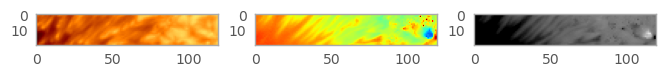

In [24]:
a = 145
b = 165
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[95:115,:,17], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[95:115,:,17], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[95:115,:,17], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

In [50]:
img = plt.imread('initial.png')

pyplot.ion()
fig = pyplot.figure()
ax = fig.add_subplot(111)

for degree in range(360):
    pyplot.clf()
    tr = transforms.Affine2D().rotate_deg(10)

    ax.imshow(img, transform=tr)
    fig.canvas.draw()

plt.show()

<Figure size 800x600 with 0 Axes>

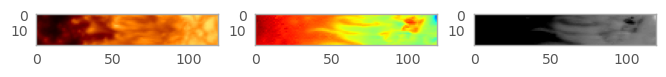

In [16]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,10], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,10], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,10], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

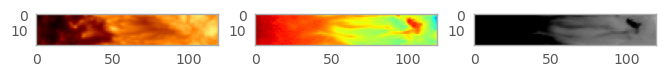

In [12]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,11], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,11], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,11], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

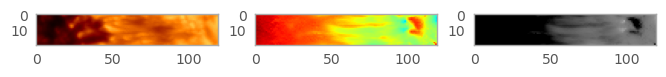

In [13]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,12], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,12], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,12], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

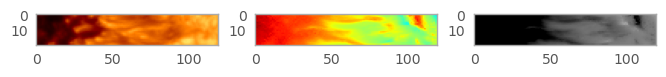

In [17]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,13], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,13], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,13], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

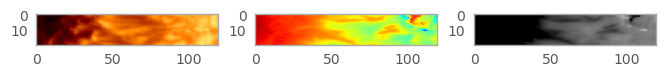

In [19]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,14], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,14], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,14], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

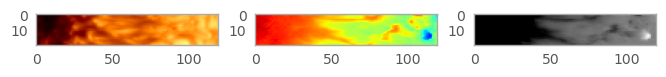

In [20]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,15], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,15], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,15], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

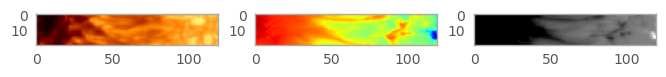

In [21]:
a = 148
b = 168
plt.ion()
fig, ax = plt.subplots(1,3)
ax[0].imshow(data_conti[a:b,:,16], cmap='afmhot', vmin=3e3, vmax=20e3)
ax[1].imshow(data_magincl[a:b,:,16], cmap='jet',  vmin=0, vmax=180)
ax[2].imshow(data_Bz[a:b,:,16], cmap='gray', vmin=-1250, vmax=1250)
plt.savefig("initial.png")
for j in range(3): ax[j].grid(False)
plt.show()

<Figure size 800x600 with 0 Axes>

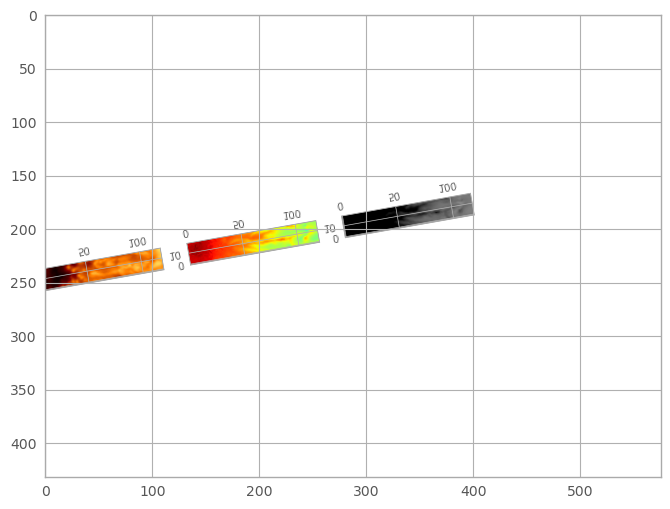

In [54]:
img = plt.imread('initial.png')

pyplot.ion()
fig = pyplot.figure()
ax = fig.add_subplot(111)

for degree in range(360):
    pyplot.clf()
    tr = transforms.Affine2D().rotate_deg(10)

    ax.imshow(img, transform=tr)
    fig.canvas.draw()

plt.show()
plt.imshow(img, transform = tr)

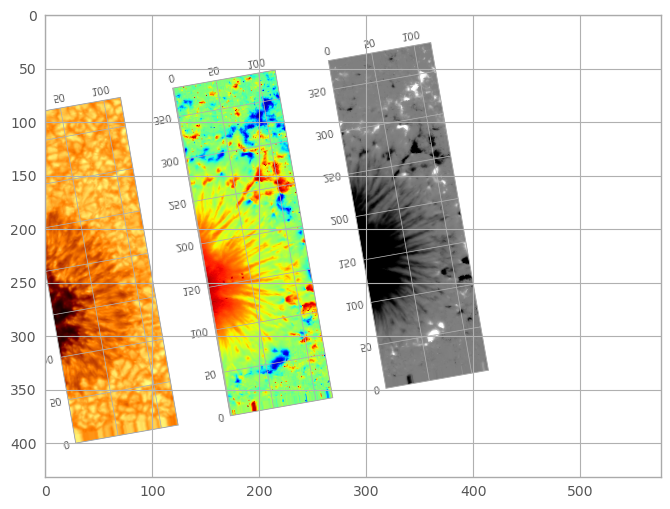

In [51]:
plt.imshow(img, transform = tr)